# **ML- Lith-ion power - Unsupervised learning  - KMeans Clustering**

## PROBELM STATEMENT
Lith-ion power is the largest producer of electric vechicle(e-vehicle) batteries.

They provide batteries on rent to e-vechicle drivers. Drivers rent a battery typically for a day and thereafter replacing it with a charged battery from the company.

Lith-ion power has a variable pricing model based on the driver's driving history. Battery life depends on factors such as over speeding, distance driven per day, etc.

**`Created a cluster model where drivers were grouped together based on the driving data and group the datapoints so that drivers will be incentivized based on the cluster.`**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


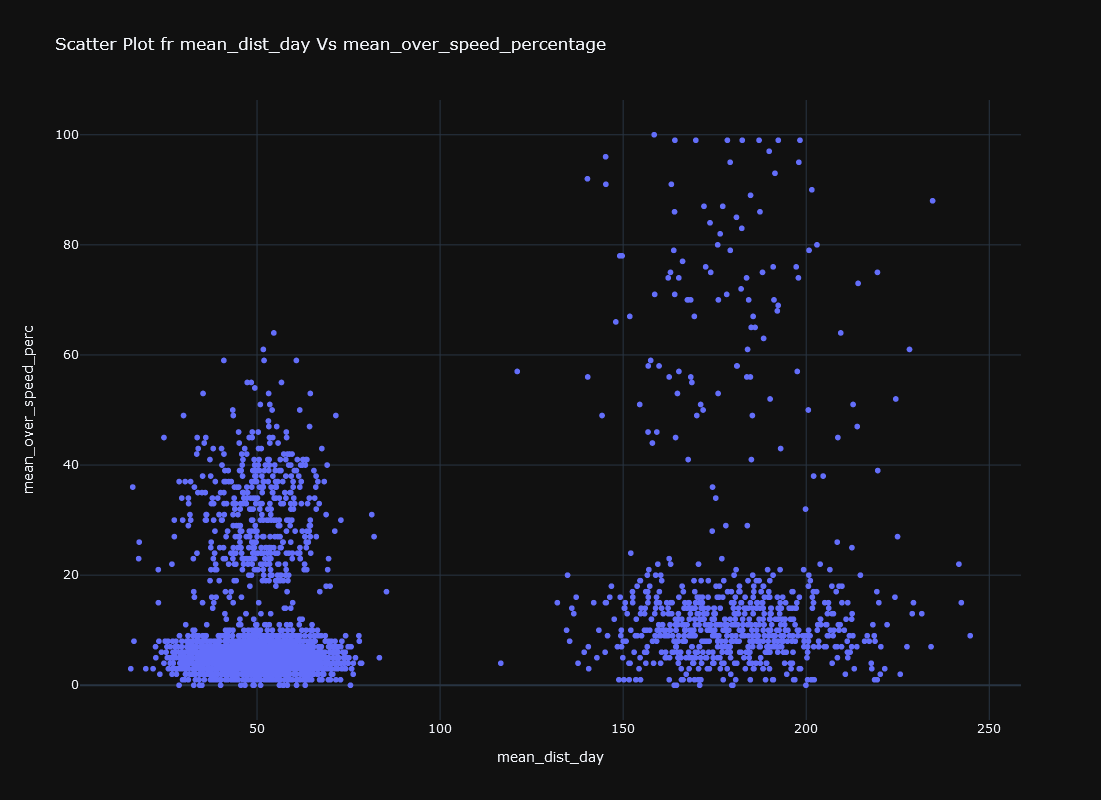

In [20]:
df_fig = px.scatter(df, 
                 x='mean_dist_day', 
                 y='mean_over_speed_perc', 
                 title='Scatter Plot fr mean_dist_day Vs mean_over_speed_percentage',
                 height=800,            
                 template="plotly_dark"
                )
df_fig.show()

In [21]:
df = df.drop(columns='id',axis=1)

In [22]:
df1 = df.copy()

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=42)

In [24]:
unique, counts= np.unique(kmeans.labels_, return_counts=True)

In [25]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 2775, 1: 696, 2: 425, 3: 104}

In [26]:
kmeans.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [ 50.46127059,  32.42823529],
       [177.83509615,  70.28846154]])

In [27]:
kmeans.inertia_

719601.5383469043

In [28]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [29]:
df1['cluster'] = kmeans.labels_

In [30]:
df1.sample(10)

,mean_dist_day,mean_over_speed_perc,cluster
1934,40.61,4,0
885,58.10,2,0
2707,48.53,6,0
2837,56.14,9,0
2873,16.39,8,0
2059,43.25,4,0
381,34.95,35,2
2710,65.32,3,0
2564,49.30,5,0
3922,156.20,4,1


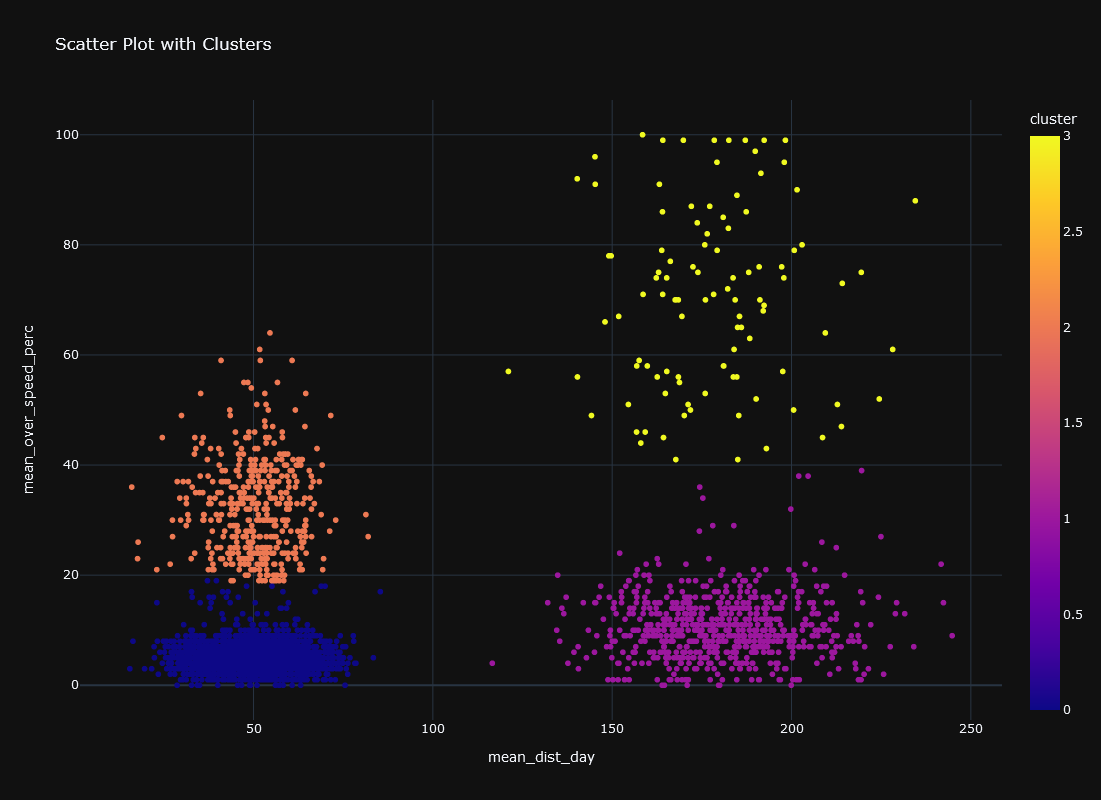

In [31]:
fig = px.scatter(df1, 
                 x='mean_dist_day', 
                 y='mean_over_speed_perc', 
                 color='cluster', 
                 title='Scatter Plot with Clusters',
                 height=800,            
                 template="plotly_dark"
                )
fig.show()

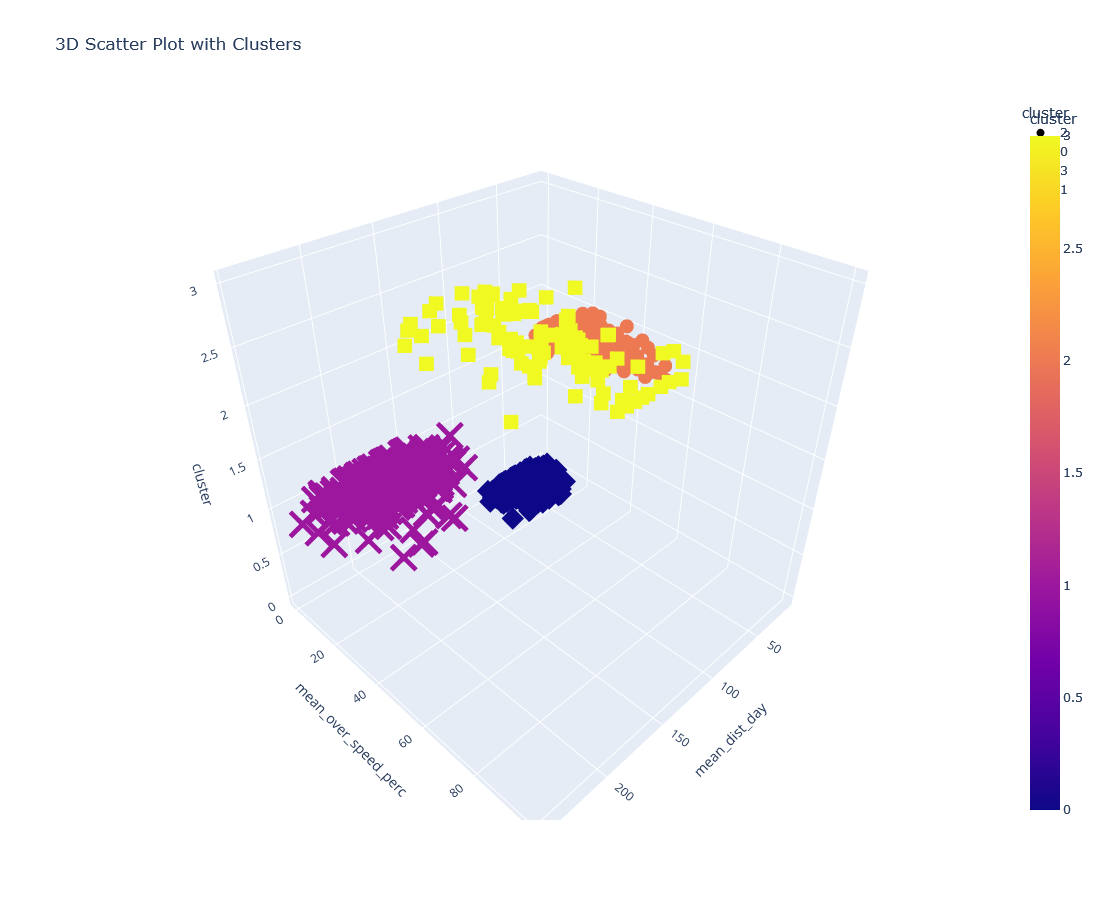

In [32]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.scatter_3d(df1, 
                    x='mean_dist_day', 
                    y='mean_over_speed_perc', 
                    z='cluster', 
                    color='cluster',
                    symbol='cluster',
                    title='3D Scatter Plot with Clusters',
                    height=900,
                    width = 1200
                   )
fig.show()
